# Regression - Predict 
 introdunctions texts to be written here
 


body starts here with 
## Imports 



In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# Figures inline and set visualization style
%matplotlib inline
sns.set()


## Data Loading and Preprocessing

### Importing Datasets 

#### Train data

In [2]:
train_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Train.csv')

In [3]:
train_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214


#### Test data

In [4]:
test_df=pd.read_csv('https://raw.githubusercontent.com/rufusseopa/Team_18_JHB_WhatTheHack_regression-predict-api-template/master/Data/Test.csv')

In [5]:
test_df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,...,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.822390,Rider_Id_192
1,Order_No_12736,User_Id_3647,Bike,3,Business,17,5,12:57:35 PM,17,5,...,5,1:25:37 PM,5,NaN,NaN,-1.272639,36.794723,-1.277007,36.823907,Rider_Id_868
2,Order_No_768,User_Id_2154,Bike,3,Business,27,4,11:08:14 AM,27,4,...,4,11:57:54 AM,5,22.8,NaN,-1.290894,36.822971,-1.276574,36.851365,Rider_Id_26
3,Order_No_15332,User_Id_2910,Bike,3,Business,17,1,1:51:35 PM,17,1,...,1,2:16:52 PM,5,24.5,NaN,-1.290503,36.809646,-1.303382,36.790658,Rider_Id_685
4,Order_No_21373,User_Id_1205,Bike,3,Business,11,2,11:30:28 AM,11,2,...,2,11:56:04 AM,6,24.4,NaN,-1.281081,36.814423,-1.266467,36.792161,Rider_Id_858


#### Additional Datasets
Riders ,Variable Defition 

### Processing Data

Create a new DataFrame data that consists of training and test sets combined. You do this because you want to preprocess the data a little bit and make sure that any operations that you perform on the training set are also being done on the test data set.

In [6]:
# Concatenate training and test sets
data = pd.concat([train_df, test_df])

In [7]:
data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1:00:38 PM,3,NaN,NaN,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,10:05:27 AM,9,19.2,NaN,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,10:25:37 AM,9,15.4,NaN,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0


Check out your new DataFrame data using the info() method.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28269 entries, 0 to 7067
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   28269 non-null  object 
 1   User Id                                    28269 non-null  object 
 2   Vehicle Type                               28269 non-null  object 
 3   Platform Type                              28269 non-null  int64  
 4   Personal or Business                       28269 non-null  object 
 5   Placement - Day of Month                   28269 non-null  int64  
 6   Placement - Weekday (Mo = 1)               28269 non-null  int64  
 7   Placement - Time                           28269 non-null  object 
 8   Confirmation - Day of Month                28269 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            28269 non-null  int64  
 10  Confirmation - Time    

There are 7 numerical variables that have missing values.

What are they?

That's right, you're missing values for the Arrival at Destination - Day of Month ,Arrival at Destination - Weekday (Mo = 1) ,Arrival at Destination - Weekday (Mo = 1),Temperature,Precipitation in millimeters and Time from Pickup to Arrival  columns! You see in the result of the .info() method above that you're missing.Ideally, you of course want all of those 28269 to have non-null values, but that isn't the case here!
However, now you'll focus on fixing the numerical variables: you will impute or fill in the missing values for the columns, using the median of the of these variables where you know them.

Note that in this case, you use the median because it's perfect for dealing with outliers. In other words, the median is useful to use when the distribution of data is skewed. Other ways to impute the missing values would be to use the mean, which you can find by adding all data points and dividing by the number of data points, or mode, which is the number that occurs the highest number of times.

#### Missing Values

In [9]:
# Impute missing numerical variables
data[missing value colum] = data.Age.fillna(data.Age.median())
data[mssing value colum] = data.Fare.fillna(data.Fare.median())

# Check out info of data
data.info()

SyntaxError: invalid syntax (<ipython-input-9-c24a74d355e6>, line 2)

Comments on the data
** the follwoing columns needs to be restructed order_no,user_id and rider _id**
**we need to combine the test and train data so that when we do the EDA BOTH DATASETS CAN BE CLEANED AND SEPERATE THEM AFTER **

In [25]:
train_df['Order No']=train_df['Order No'].str.rpartition('_')[2]
train_df['User Id']=train_df['User Id'].str.rpartition('_')[2]
train_df['Rider Id']=train_df['Rider Id'].str.rpartition('_')[2]
 

In [28]:
train_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [31]:
train_df['Order No']=train_df['Order No'].astype(int)
train_df['User Id']=train_df['User Id'].astype(int)
train_df['Rider Id']=train_df['Rider Id'].astype(int)
 

In [32]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  int64  
 1   User Id                                    21201 non-null  int64  
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

## Data Visualisation

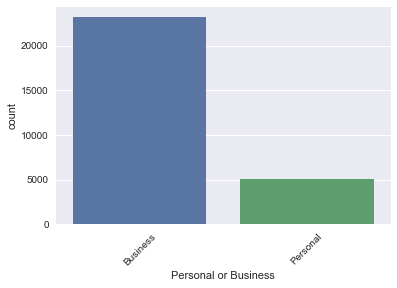

In [33]:
sns.countplot(x='Personal or Business', data=data);
plt.xticks(rotation=45);

(array([   0,    1,    2, ..., 4064, 4065, 4066]),
 <a list of 4067 Text xticklabel objects>)

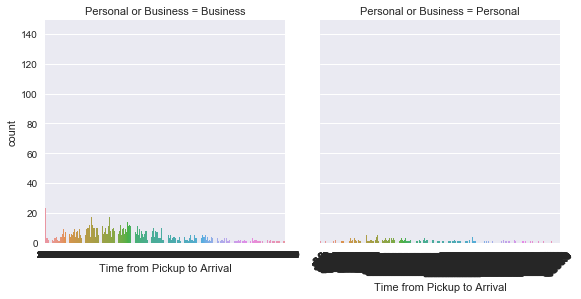

In [33]:
sns.factorplot(x='Time from Pickup to Arrival', col='Personal or Business', kind='count', data=data)
plt.xticks(rotation=45)

import seaborn as sns; sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset(train_df)
g = sns.pairplot(iris)

we need a function that can help us find relationship between varibles please check this link https://seaborn.pydata.org/generated/seaborn.pairplot.html

## Modelling 

## Performance Evaluation 

## Model Analysis